In [116]:
import pandas as pd
dfp = pd.read_csv('../data/positive.csv')
dfn = pd.read_csv('../data/negative.csv')

In [117]:
df = dfp.append(dfn)

/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_41264/1268458048.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfp.append(dfn)


In [118]:
#df = df.replace({'Positive': 0, 'Negative': 1})

In [119]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df.tokens_text.values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

In [120]:
df2 = pd.DataFrame(X.toarray(),columns=words)

In [121]:
X = df2
y = pd.DataFrame(df['Sentiment'])

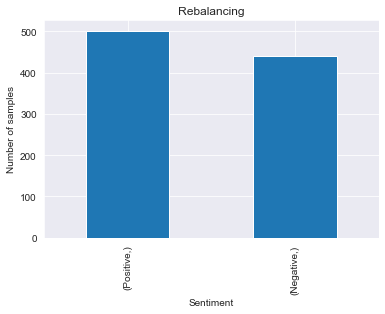

In [122]:
import matplotlib.pyplot as plt
y.value_counts()
plt.title('Rebalancing')
plt.xlabel('Class')
plt.ylabel('Number of samples')
my_xticks = ['Positive','Negative']
#plt.xticks(y.unique, my_xticks)
y.value_counts().plot(kind='bar')
plt.show()

In [123]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
counter = Counter(y)
print(counter)
over = SMOTE(sampling_strategy='all')
under = RandomUnderSampler(sampling_strategy='all')
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({'Sentiment': 1})
Counter({'Sentiment': 1})


In [124]:
y = y.reset_index()
y = y['Sentiment']

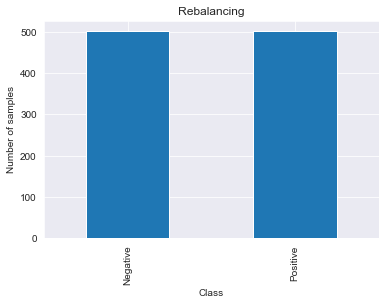

In [131]:
import matplotlib.pyplot as plt
y.value_counts()
plt.title('Rebalancing')
plt.xlabel('Class')
plt.ylabel('Number of samples')
y.value_counts().plot(kind='bar')
plt.show()

In [132]:
y

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
999     Positive
1000    Positive
1001    Positive
1002    Positive
1003    Positive
Name: Sentiment, Length: 1004, dtype: object

In [133]:
X['Sentiment'] = y

/var/folders/mz/c9vb3s9n2hn8zbzc6grlnzwc0000gn/T/ipykernel_41264/4240603959.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['Sentiment'] = y


In [134]:
X

,ability,able,absolutely,access,according,account,accounts,active,add,added,...,worldfirst,worlds,worth,wow,wrong,yeah,year,years,yor,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


In [135]:
X.to_csv("../data/dataset_rebalanced.csv",index=False)

In [115]:
df

,ability,able,absolutely,access,according,account,accounts,active,add,added,...,994,995,996,997,998,999,1000,1001,1002,1003
0,0.0,0.0,0.593802,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,0.0,0.0,0.000000,0.0,0.341906,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
